In [2]:
import json
import os
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
raw_dir = '/home/amiz/dawn/raw_data'






In [29]:


raw_file = os.path.join(raw_dir, 'data_3.csv')
data = pd.read_csv(raw_file, encoding='utf-8', on_bad_lines='skip')

data.head()


#  \
# For       data    required        for   
  available from    the            NCEI   
  or        consult a               CCM   
  STATION:  262PG   NaN            None   
  STATION   NAME:   Chowchila  Mountain   

                                                                             The  \
# For       data    required                                                   a   
  available from    the        (https://www.ncdc.noaa.gov/customer-support/ce...   
  or        consult a                                     (http://www.nicm.org).   
  STATION:  262PG   NaN                                                     None   
  STATION   NAME:   Chowchila                                               None   

                              provisional  data available  here         are  \
# For       data    required        court    of       law    or  regulatory   
  available from    the              None  None      None  None        None   
  or        consult a                None  None      None  None        None   
  STATION:  262PG   NaN              None  None      None  None        None   
  STATION   NAME:   Chowchila        None  None      None  None        None   

                                intended     for diverse         user  \
# For       data    required   purposes,  review     the  information   
  available from    the             None    None    None         None   
  or        consult a               None    None    None         None   
  STATION:  262PG   NaN             None    None    None         None   
  STATION   NAME:   Chowchila       None    None    None         None   

                               applications.  
# For       data    required             NaN  
  available from    the                  NaN  
  or        consult a                    NaN  
  STATION:  262PG   NaN                  NaN  
  STATION   NAME:   Chowchila            NaN

In [13]:
inf = [d for d in data if d['sname'] == 'בית דגן']
df = pd.DataFrame(inf)  
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df.drop(['sname'], axis=1, inplace=True)

# Convert numeric fields, coercing errors like '-' to NaN
cols_to_numeric = df.columns  # add more if needed
for col in cols_to_numeric:
    if col != 'date':
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.head())
print(df.columns)
print(df['date'])

                 date      BP    RH    TD  TDmax  TDmin    TG  TW     WD  \
0 2024-01-01 22:00:00  1015.0  91.0  13.2   13.3   13.2  12.1 NaN  138.0   
1 2024-01-01 22:10:00  1015.0  91.0  13.1   13.3   13.0  12.0 NaN  158.0   
2 2024-01-01 22:20:00  1014.9  92.0  13.1   13.1   13.0  11.9 NaN  158.0   
3 2024-01-01 22:30:00  1015.0  92.0  12.9   13.0   12.9  12.0 NaN  179.0   
4 2024-01-01 22:40:00  1015.0  92.0  12.9   13.0   12.8  11.8 NaN  146.0   

   WDmax   WS  WS1mm  Ws10mm  Time  WSmax  STDwd  Rain  
0  139.0  1.0    1.2     1.0   NaN    1.3    2.4   0.0  
1  164.0  1.0    1.2     1.1   NaN    1.3    9.1   0.0  
2  153.0  1.6    1.8     1.6   NaN    1.9    3.3   0.0  
3  186.0  1.6    2.0     1.7   NaN    2.1    8.1   0.0  
4  157.0  1.6    1.9     1.8   NaN    2.0   13.1   0.0  
Index(['date', 'BP', 'RH', 'TD', 'TDmax', 'TDmin', 'TG', 'TW', 'WD', 'WDmax',
       'WS', 'WS1mm', 'Ws10mm', 'Time', 'WSmax', 'STDwd', 'Rain'],
      dtype='object')
0       2024-01-01 22:00:00
1     

In [25]:

import pickle


def normalize_temperature_days(df):
    df = df.copy()
    
    # Ensure 'date' column is datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Create full date range (10-min intervals from min to max date)
    full_range = pd.date_range(
        start=df['date'].min().floor('D'),
        end=df['date'].max().ceil('D') - pd.Timedelta(minutes=10),
        freq='10min'
    )
    
    # Set 'date' as index and reindex with full range
    df = df.set_index('date')
    df = df.reindex(full_range)
    df = df.interpolate(method='linear')

    # Reset index and rename
    df = df.reset_index().rename(columns={'index': 'date'})
    MIN_TEMP = -10
    MAX_TEMP = 50

    df['normalized'] = (df['TD'] - MIN_TEMP) / (MAX_TEMP - MIN_TEMP)
    df['date_only'] = df['date'].dt.date

    df.to_pickle('daily_data.pkl')

    # Extract date-only for grouping
    
    # Group by day and collect TD values
    result = (
        df.groupby('date_only')['normalized']
        .apply(list)
        .reset_index()
        .rename(columns={'date_only': 'date', 'normalized': 'data'})
    )

    # Return as list of dicts
    return result.to_dict(orient='records')


In [26]:
daily_data = normalize_temperature_days( df[['date', 'TD']])
daily_data = daily_data[1:-1]


In [15]:
pprint(daily_data)
with open('daily_data.json', 'w') as f:
    json.dump(daily_data, f)


[{'data': [0.375,
           0.3733333333333333,
           0.375,
           0.3716666666666667,
           0.37,
           0.36833333333333335,
           0.36666666666666664,
           0.365,
           0.36333333333333334,
           0.36166666666666664,
           0.36000000000000004,
           0.35833333333333334,
           0.35666666666666663,
           0.35333333333333333,
           0.35,
           0.3466666666666667,
           0.345,
           0.345,
           0.345,
           0.3466666666666667,
           0.34833333333333333,
           0.35,
           0.3516666666666667,
           0.35333333333333333,
           0.35666666666666663,
           0.36166666666666664,
           0.365,
           0.3783333333333333,
           0.38833333333333336,
           0.39333333333333337,
           0.39333333333333337,
           0.39333333333333337,
           0.39333333333333337,
           0.39333333333333337,
           0.39499999999999996,
           0.3966666666666666

TypeError: Object of type date is not JSON serializable

In [83]:
for r in daily_data:
    if (len(r['data']) != 144):
        print(r['date'])
        print(len(r['data']))




[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []


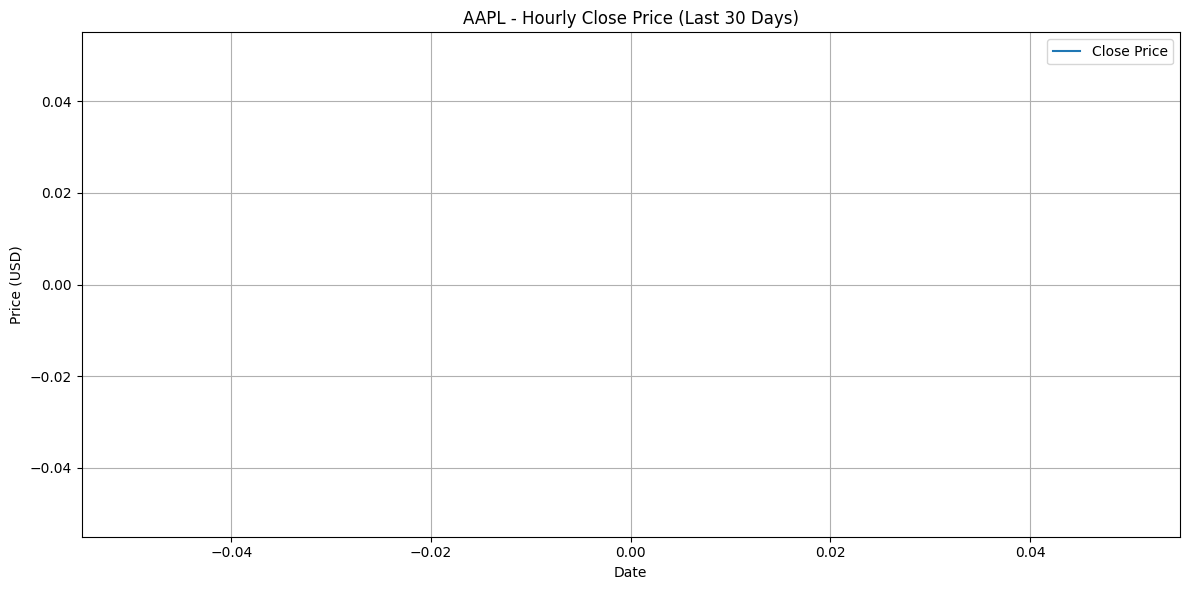

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
# Define the ticker and parameters
ticker = "AAPL"  # Example: Apple Inc.
data = yf.download(
    tickers=ticker,
    period="20d",       # Last 30 days
    interval="1h",      # Hourly data
    auto_adjust=True    # Adjust for splits/dividends if needed
)

# Display the first few rows
print(data.head())
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title(f"{ticker} - Hourly Close Price (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
